In [ ]:
import os
os.chdir('C:/AI Resume Matcher')
import pandas as pd
import sys
sys.path.append('src')
# Import preprocessing
from preprocessing import preprocess_text
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [2]:
# Process training data
print("\n1. Processing training data...")
df1 = pd.read_csv("data/processed/train.csv")
print(f"Training data loaded: {df1.shape}")


1. Processing training data...
Training data loaded: (5224, 8)


In [3]:
# Preprocessing
print("Applying preprocessing...")
df1['cv_final'] = df1['cv_skill'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')
df1['jd_final'] = df1['jd_requirement'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')

Applying preprocessing...


In [4]:
# Save training data
df1.to_csv('data/processed/train_clean.csv', index=False)
print('✅ Training data saved to data/processed/train_clean.csv')

✅ Training data saved to data/processed/train_clean.csv


In [5]:
# Process validation data
print("\n2. Processing validation data...")
df2 = pd.read_csv("data/processed/val.csv")
print(f"Validation data loaded: {df2.shape}")

df2['cv_final'] = df2['cv_skill'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')
df2['jd_final'] = df2['jd_requirement'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')

# Save results
df2.to_csv('data/processed/val_clean.csv', index=False)
print('✅ Preprocessed validation data saved to data/processed/val_clean.csv')


2. Processing validation data...
Validation data loaded: (653, 8)
✅ Preprocessed validation data saved to data/processed/val_clean.csv


In [6]:
# Process test data
print("\n3. Processing test data...")
df3 = pd.read_csv("data/processed/test.csv")
print(f"Test data loaded: {df3.shape}")

df3['cv_final'] = df3['cv_skill'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')
df3['jd_final'] = df3['jd_requirement'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')

# Save results
df3.to_csv('data/processed/test_clean.csv', index=False)
print('✅ Preprocessed test data saved to data/processed/test_clean.csv')


3. Processing test data...
Test data loaded: (654, 8)
✅ Preprocessed test data saved to data/processed/test_clean.csv


In [7]:
# Data quality analysis
print("\n4. Data Quality Analysis")
print("=" * 40)

def analyze_data_quality(df, name):
    print(f"\n{name} Dataset Analysis:")
    print(f"- Total samples: {len(df)}")
    print(f"- Missing CV skills: {df['cv_skill'].isnull().sum()}")
    print(f"- Missing JD requirements: {df['jd_requirement'].isnull().sum()}")
    print(f"- Avg CV words: {df['cv_skill'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0).mean():.1f}")
    print(f"- Avg JD words: {df['jd_requirement'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0).mean():.1f}")
    
    # Top words in CV skills
    all_words = []
    for text in df['cv_final'].dropna():
        all_words.extend(str(text).lower().split())
    top_words = Counter(all_words).most_common(5)
    print(f"- Top 5 CV words: {[word for word, count in top_words]}")

analyze_data_quality(df1, "Training")
analyze_data_quality(df2, "Validation")
analyze_data_quality(df3, "Test")


4. Data Quality Analysis

Training Dataset Analysis:
- Total samples: 5224
- Missing CV skills: 0
- Missing JD requirements: 0
- Avg CV words: 11.4
- Avg JD words: 9.3
- Top 5 CV words: ['skill', 'experience', 'proficient', 'using', 'knowledge']

Validation Dataset Analysis:
- Total samples: 653
- Missing CV skills: 0
- Missing JD requirements: 0
- Avg CV words: 11.3
- Avg JD words: 9.0
- Top 5 CV words: ['skill', 'proficient', 'experience', 'using', 'data']

Test Dataset Analysis:
- Total samples: 654
- Missing CV skills: 0
- Missing JD requirements: 0
- Avg CV words: 10.9
- Avg JD words: 9.4
- Top 5 CV words: ['skill', 'experience', 'using', 'data', 'proficient']


In [8]:
# Show preprocessing comparison
print("\n5. Preprocessing Comparison")
print("=" * 40)
print('Training Sample:')
print('Original CV:', df1['cv_skill'].iloc[0][:100] + "..." if pd.notnull(df1['cv_skill'].iloc[0]) else "N/A")
print('Cleaned CV:', df1['cv_final'].iloc[0][:100] + "..." if pd.notnull(df1['cv_final'].iloc[0]) else "N/A")
print('Original JD:', df1['jd_requirement'].iloc[0][:100] + "..." if pd.notnull(df1['jd_requirement'].iloc[0]) else "N/A")
print('Cleaned JD:', df1['jd_final'].iloc[0][:100] + "..." if pd.notnull(df1['jd_final'].iloc[0]) else "N/A")


5. Preprocessing Comparison
Training Sample:
Original CV: Quickly learn new technologies and adapt to challenges...
Cleaned CV: quickly learn new technology adapt challenge...
Original JD: Willingness to research and stay updated on advancements in Generative AI and related fields....
Cleaned JD: willingness research stay updated advancement generative artificial intelligence related field...



6. Text Length Visualizations


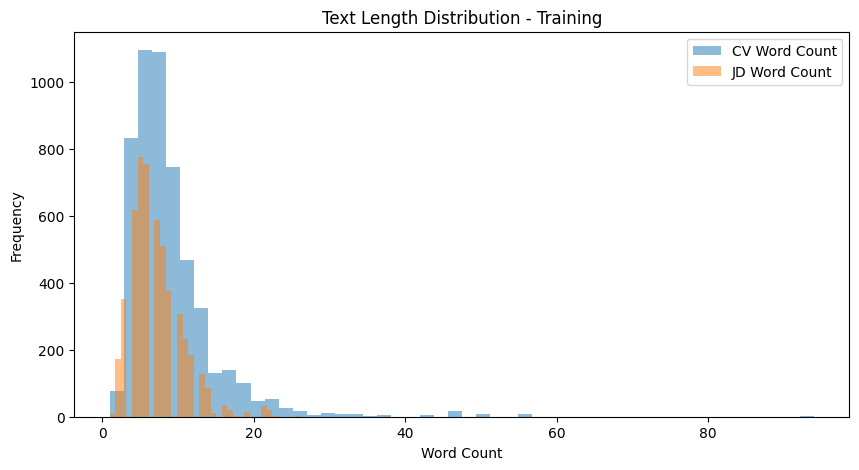

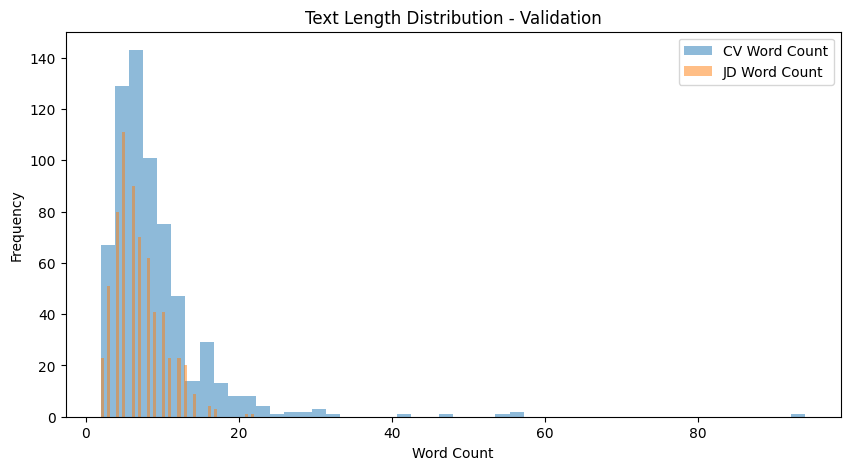

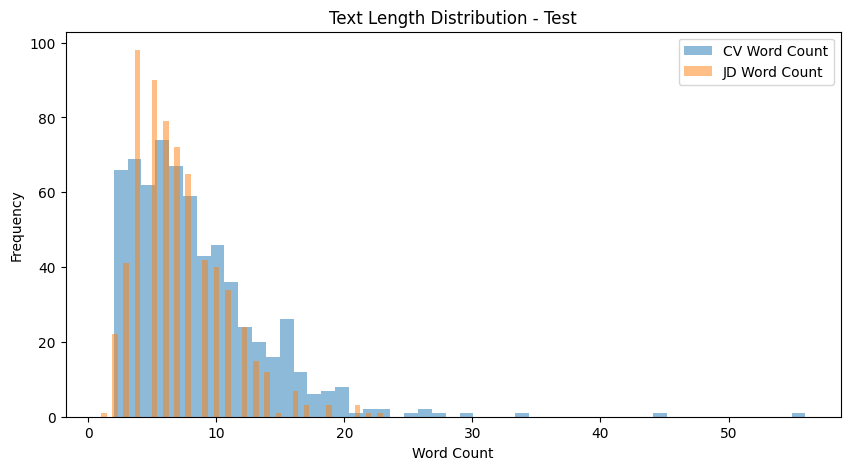

In [9]:
# Added cell: Visualize text length distributions
print("\n6. Text Length Visualizations")
print("=" * 40)

def plot_text_lengths(df, name):
    df['cv_word_count'] = df['cv_final'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    df['jd_word_count'] = df['jd_final'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    
    plt.figure(figsize=(10, 5))
    plt.hist(df['cv_word_count'], bins=50, alpha=0.5, label='CV Word Count')
    plt.hist(df['jd_word_count'], bins=50, alpha=0.5, label='JD Word Count')
    plt.title(f'Text Length Distribution - {name}')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_text_lengths(df1, "Training")
plot_text_lengths(df2, "Validation")
plot_text_lengths(df3, "Test")

In [10]:
# Added cell: Final summary
print("\n7. Preprocessing Summary")
print("=" * 40)
print("Preprocessing completed for training, validation, and test datasets!")
print("Key steps:")
print("- Cleaned and normalized CV skills and JD requirements")
print("- Saved preprocessed data to CSV files")
print("- Performed basic data quality analysis")
print("- Generated text length visualizations")
print("\nReady for model training!")


7. Preprocessing Summary
Preprocessing completed for training, validation, and test datasets!
Key steps:
- Cleaned and normalized CV skills and JD requirements
- Saved preprocessed data to CSV files
- Performed basic data quality analysis
- Generated text length visualizations

Ready for model training!
